# Visualizations of the network

In [1]:
import matplotlib.pyplot as plt;plt.set_cmap('binary')
import numpy as np

from utils import OneHotEncoder
from dataset import Dataset
from cnn import Cnn

<Figure size 640x480 with 0 Axes>

### Load the state trained from cnn.ipynb

In [2]:
dataset = Dataset("mnist")
cnn = Cnn()
encoder = OneHotEncoder(10)

In [3]:
cnn.layers[0].kernels = np.load("weights/conv1_kernels.npy")
cnn.layers[3].kernels = np.load("weights/conv2_kernels.npy")
cnn.layers[6].weights = np.load("weights/dense1_weights.npy")
cnn.layers[6].biases = np.load("weights/dense1_biases.npy")
cnn.layers[8].weights = np.load("weights/dense2_weights.npy")
cnn.layers[8].biases = np.load("weights/dense2_biases.npy")

### First 5 predictions in train set

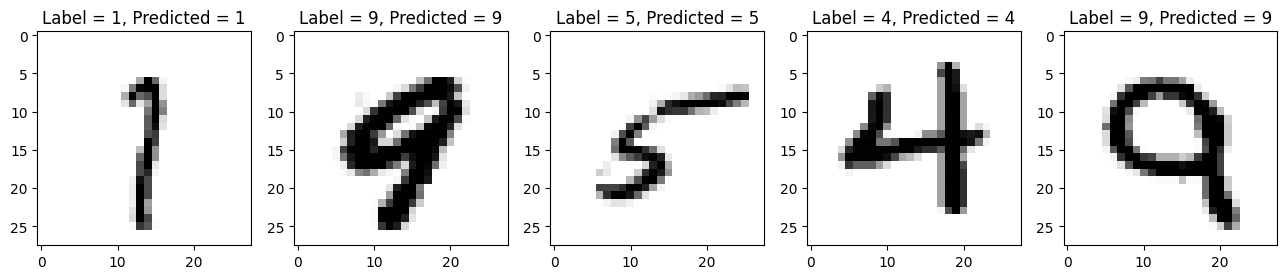

In [40]:
plt.figure(figsize=(16,8))
plt.tight_layout()
for i in range(5):
    image = dataset.train_images[i]
    label = dataset.train_labels[i]

    target = encoder(label)

    pred = cnn.forward(image)

    plt.subplot(int(f'15{i+1}'))
    plt.title(f'Label = {label}, Predicted = {np.argmax(pred)}')
    plt.imshow(image.reshape(28,28))

### First 5 predictions in test set

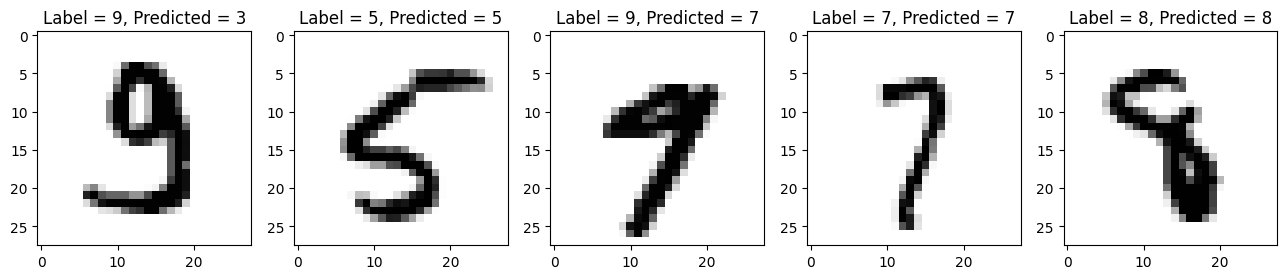

In [41]:
plt.figure(figsize=(16,8))
plt.tight_layout()
for i in range(5):
    image = dataset.test_images[i]
    label = dataset.test_labels[i]

    target = encoder(label)

    pred = cnn.forward(image)

    plt.subplot(int(f'15{i+1}'))
    plt.title(f'Label = {label}, Predicted = {np.argmax(pred)}')
    plt.imshow(image.reshape(28,28))

## Learned weights

In [37]:
cnn.layers

In [4]:
conv1 = cnn.layers[0]
relu1 = cnn.layers[1]
pool1 = cnn.layers[2]
conv2 = cnn.layers[3]
relu2 = cnn.layers[4]
dense1 = cnn.layers[6]
dense2 = cnn.layers[8]

### First convolution layer

In [44]:
channels_out, channels_in, kernel_height, kernel_width = conv1.kernels.shape
channels_out, channels_in, kernel_height, kernel_width

(32, 1, 5, 5)

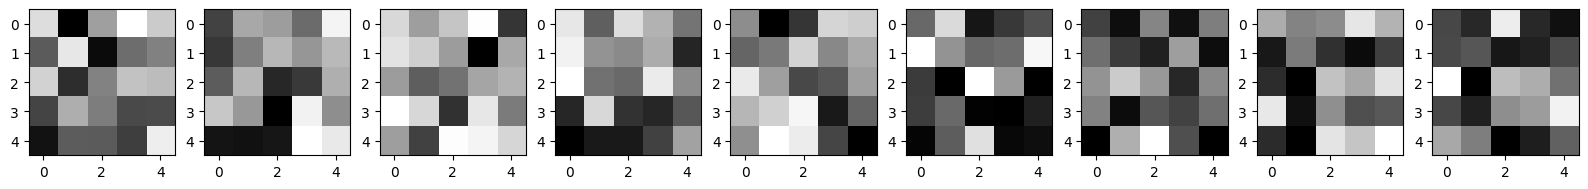

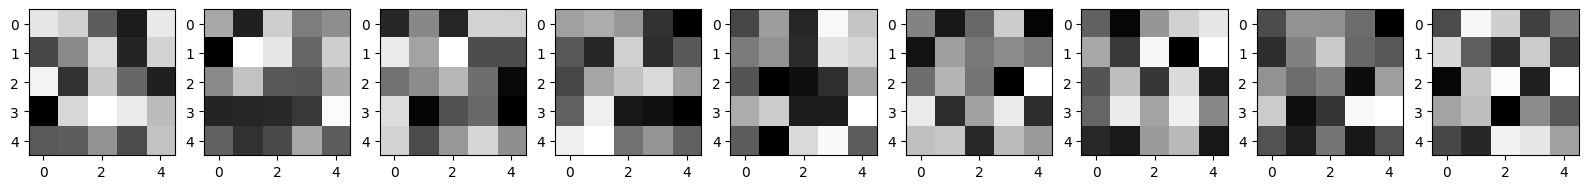

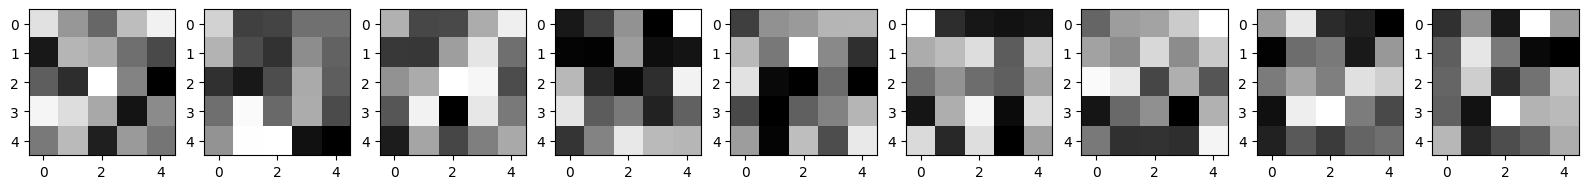

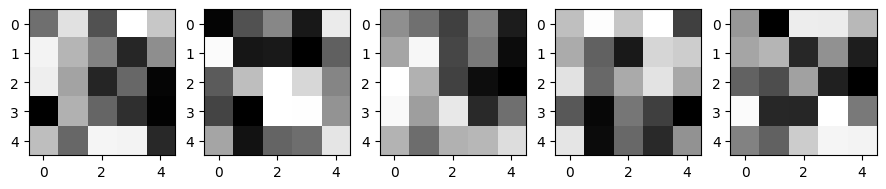

In [45]:
for i in range(channels_out):
    if i % 9 == 0:
        plt.figure(figsize=(20,5))
    plt.subplot(int(f"19{i%9 + 1}"))
    plt.imshow(conv1.kernels[i,0,:,:])

### Second convolution layer

In [46]:
channels_out, channels_in, kernel_height, kernel_width = conv2.kernels.shape
channels_out, channels_in, kernel_height, kernel_width

(64, 32, 5, 5)

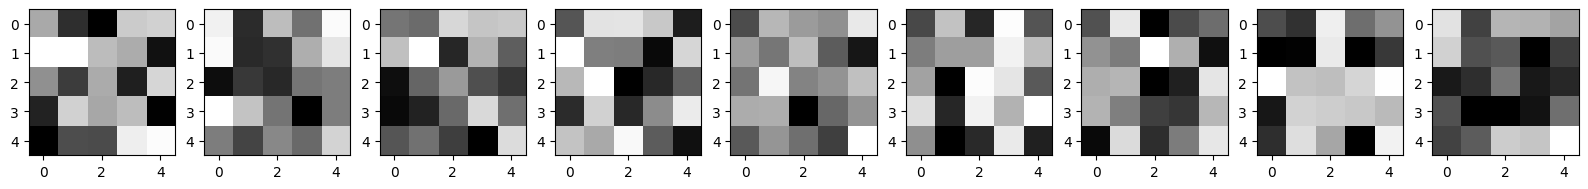

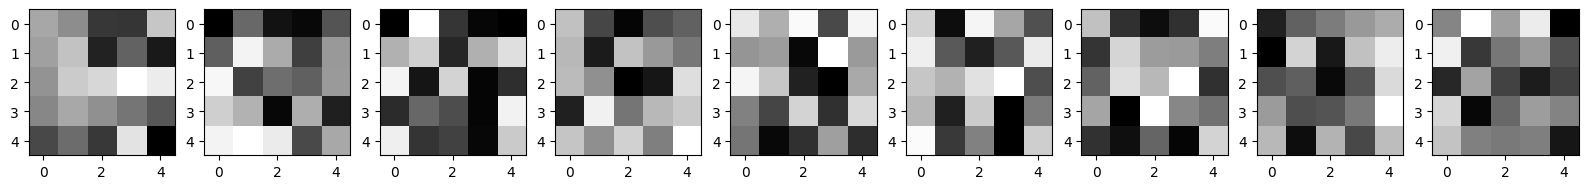

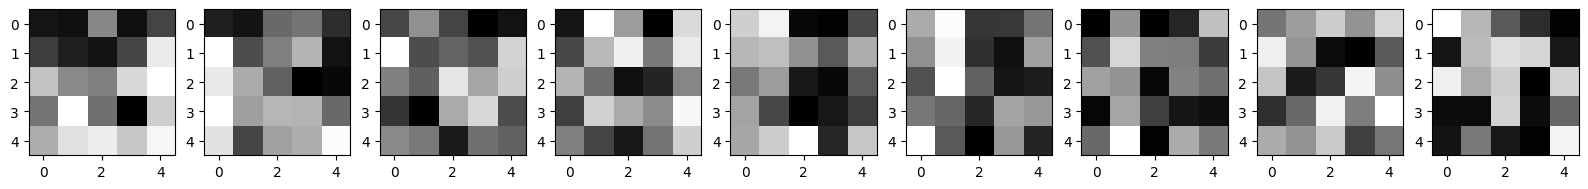

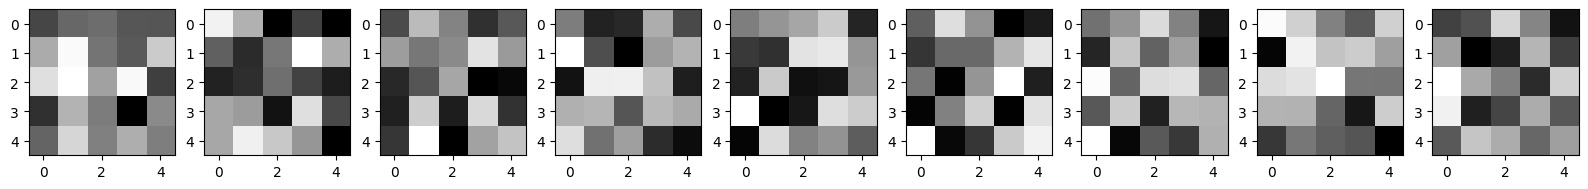

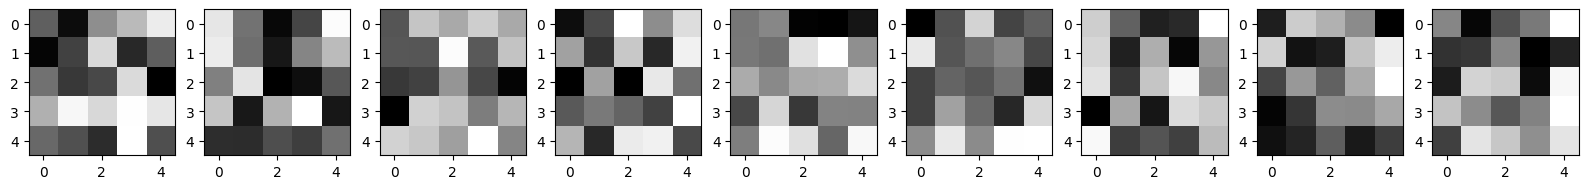

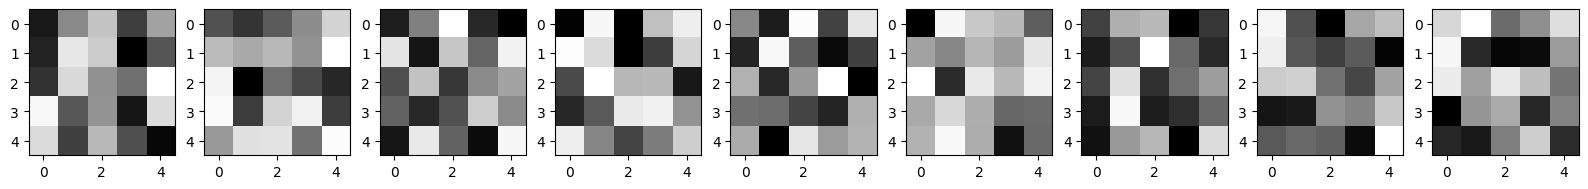

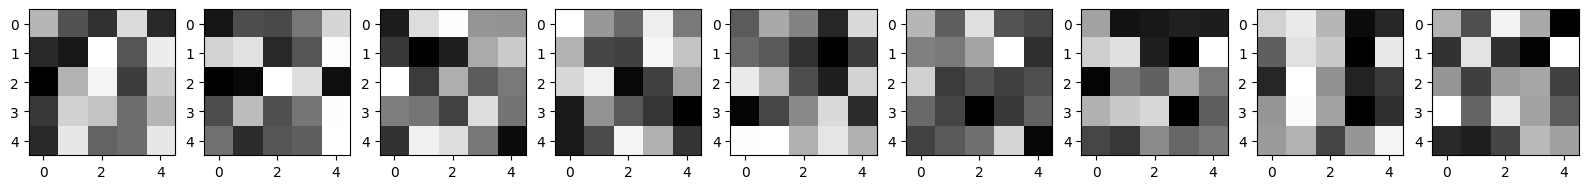

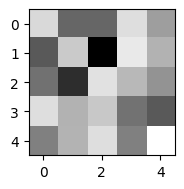

In [47]:
for i in range(channels_out):
    if i % 9 == 0:
        plt.figure(figsize=(20,5))
    plt.subplot(int(f"19{i%9 + 1}"))
    plt.imshow(conv2.kernels[i,0,:,:])

## Dense weights

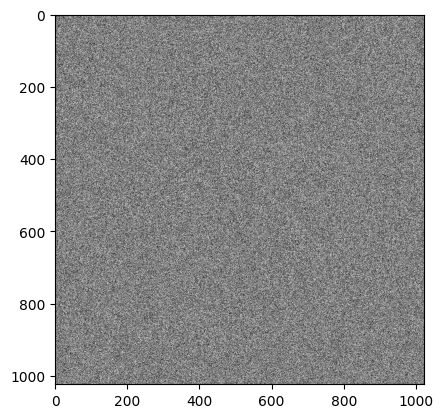

In [6]:
plt.imshow(dense1.weights)

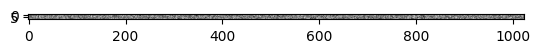

In [7]:
plt.imshow(dense2.weights)

## Following an image through the network

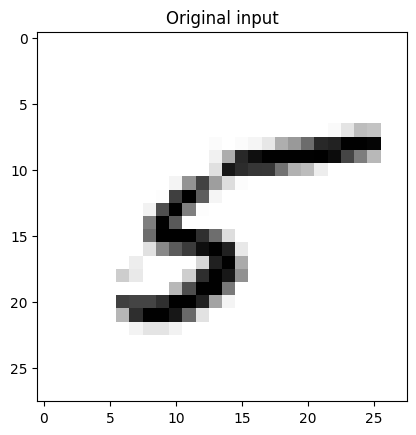

<Figure size 2000x500 with 0 Axes>

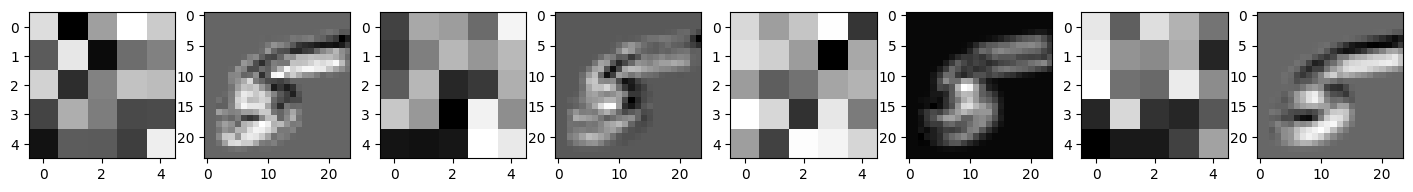

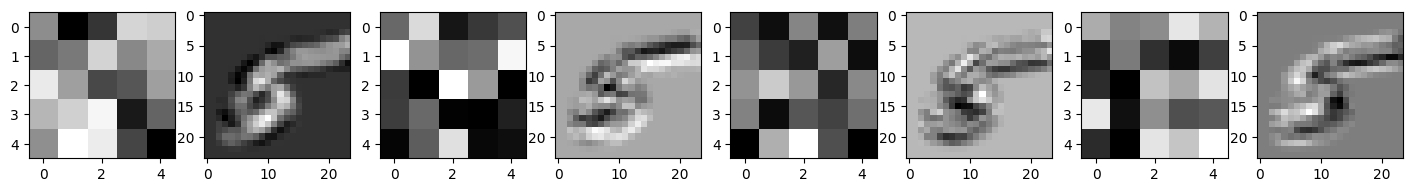

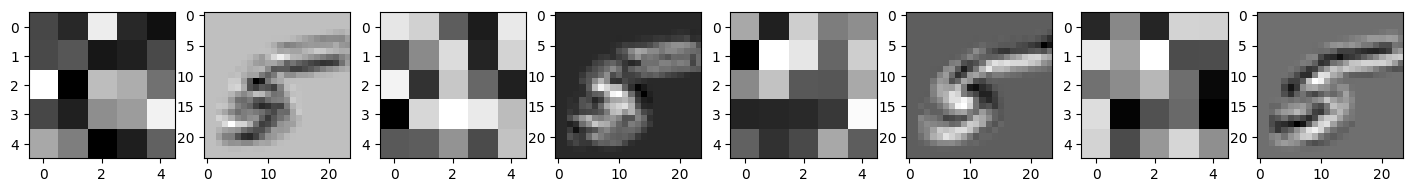

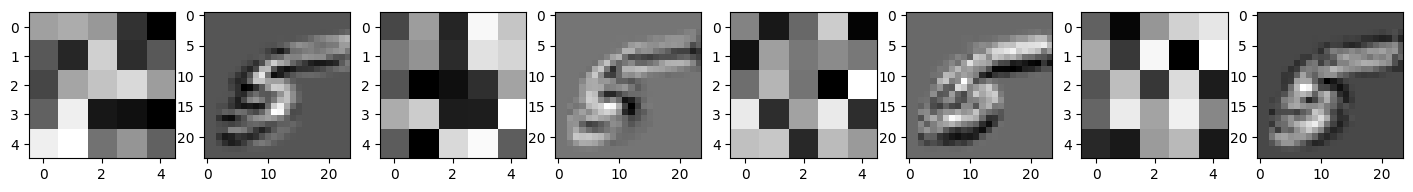

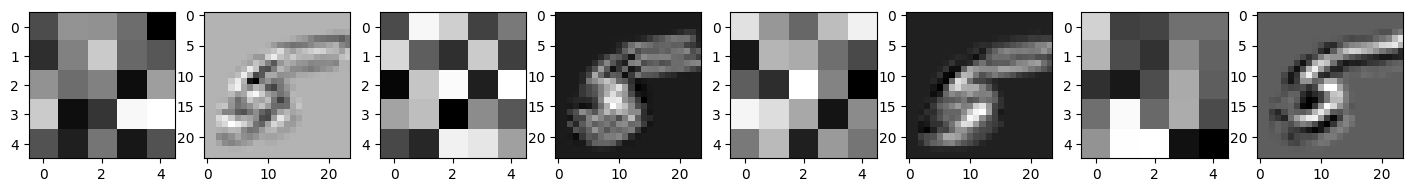

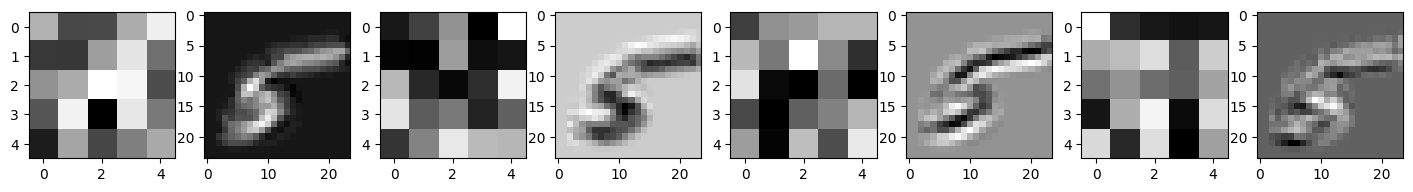

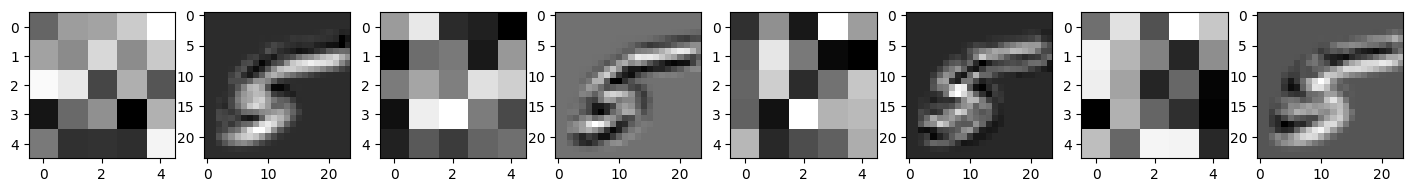

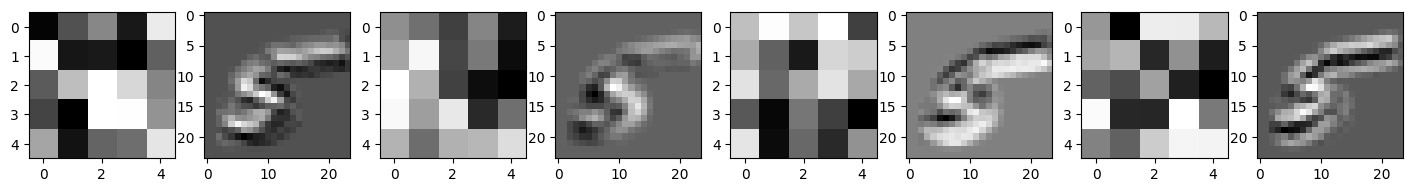

In [35]:
image = dataset.train_images[2]
label = dataset.train_labels[2]

plt.figure()
plt.title("Original input")
plt.imshow(image.reshape(28,28))

conv1_pass = conv1(image)

plt.figure(figsize=(20,5))
for i in range(conv1_pass.shape[0]):
    if 2*i%8==0:
        plt.figure(figsize=(20,5))
    plt.subplot(int(f"19{2*i%8+1}"))
    plt.imshow(conv1.kernels[i,0,:,:])
    plt.subplot(int(f"19{2*i%8+2}"))
    plt.imshow(conv1_pass[i,:,:])

In [36]:
cnn.layers

In [ ]:
conv1_pass = cnn.layers[1](image)